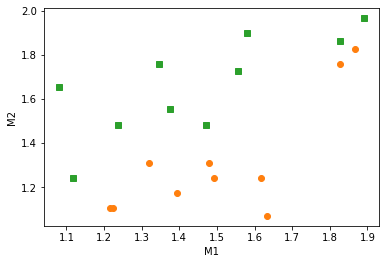

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pycbc import waveform
from  pycbc.filter import  match
N=10
m1=1+np.random.rand(N)
m2=1+np.random.rand(N)
m1est=np.zeros(N)
m2est=np.zeros(N)
flower=20
ffinal=1024
tmax=120.0
df=1/tmax
Nt=30
tm=np.linspace(1.0, 2, Nt)
tm1, tm2=np.meshgrid(tm, tm)
for kk in range(N) :
    cross=np.zeros((Nt,Nt))
    sigp,sigc  = waveform. get_fd_waveform(approximant="TaylorF2",
                             mass1=m1[kk], mass2=m2[kk], delta_f=df, f_lower=flower, 
                                     f_final=ffinal)
    for ii in range(Nt) :
        for jj in range(ii) :
            tmp, tmc = waveform. get_fd_waveform(approximant="TaylorF2",
                             mass1=tm1[ii,jj], mass2=tm2[ii,jj], delta_f=df, f_lower=flower, 
                                     f_final=ffinal  )
            mp=match(sigp, tmp, low_frequency_cutoff=flower, high_frequency_cutoff=ffinal)
            cross[jj,ii]=mp[0]
    max1=0 
    idx=None
    idy=None
    for ii in range(Nt):
        for jj in range(Nt):
            if  max1 < cross[ii, jj] :
                max1=cross[ii, jj]
                idx=ii
                idy=jj
    m1est[kk]=tm[idx]
    m2est[kk]=tm[idy]  
plt.plot(m1, m1est, 'oC1', label='M1')
plt.plot(m2,m2est, 'sC2' ,label='M2')
plt.xlabel('M1')
plt.ylabel('M2')
plt.show()

In [6]:
print(mp[0])

0.06686669053960406


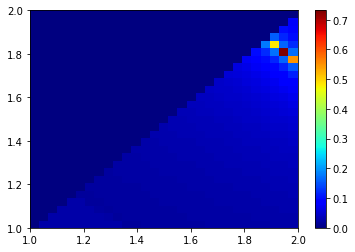

In [7]:

plt.pcolor(tm1, tm2, cross,cmap='jet')
plt.colorbar()